In [38]:
# from plotly.subplots import make_subplots
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from icecream import ic



# 1 -/   Mean,variance and median of an image

In [3]:
fileName = '/home/pascal/Computer_Vision/working_w_images/fish.mp4'
# Open Video
cap = cv2.VideoCapture(fileName)
nFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
ic(f'# of frames = {nFrames}')

frames = []
for fid in range(nFrames):
    cap.set(cv2.CAP_PROP_POS_FRAMES, fid)
    _, frame = cap.read()
    frames.append(frame)

# cv2.imshow('frame', frames[0])
# cv2.imshow('frame', frames[-1])


ic| f'# of frames = {nFrames}': '# of frames = 497'


In [9]:
len(frames)
frames[0].shape

(540, 960, 3)

In [14]:
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)
averageFrame = np.average(frames, axis=0).astype(dtype=np.uint8)
variance = np.var(frames, axis=0).astype(dtype=np.uint8)



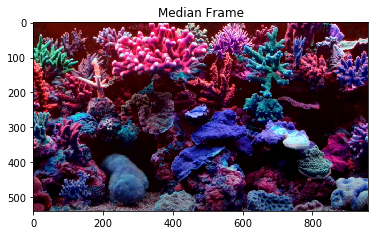

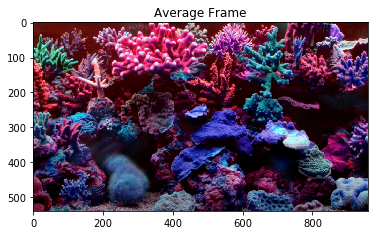

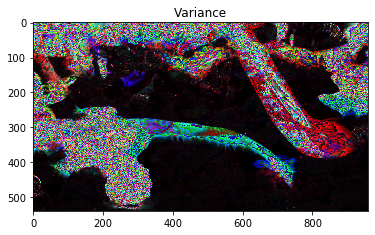

In [15]:
plt.imshow(medianFrame)
plt.title('Median Frame')
plt.show()

plt.imshow(averageFrame)
plt.title('Average Frame')
plt.show()

plt.imshow(variance)
plt.title('Variance')
plt.show()


# 2 -/ Log enhancement

(256, 256)

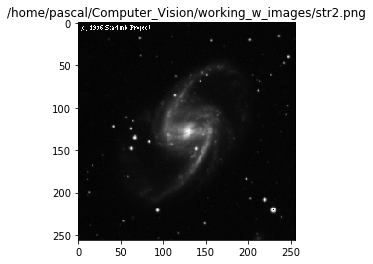

In [29]:
filename = '/home/pascal/Computer_Vision/working_w_images/str2.png'
I = cv2.imread(filename, 0)
plt.imshow(I, cmap='gray')
plt.title(filename)


<ipython-input-35-87a8b30da4bf>:6: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(I + 1))


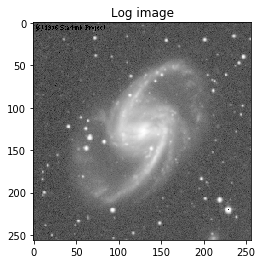

In [35]:
# one = np.ones((I.shape))
# c = np.log(one+I)
# c
R = np.max(I)
c = 255/np.log(1+R)
log_image = c * (np.log(I + 1))
log_image = np.array(log_image, dtype=np.uint8)

plt.imshow(log_image, cmap='gray')
plt.title('Log image')
plt.show()


# 3 -/ Difference between 2 images 

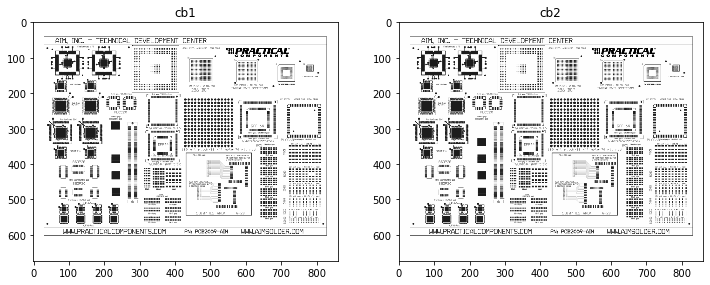

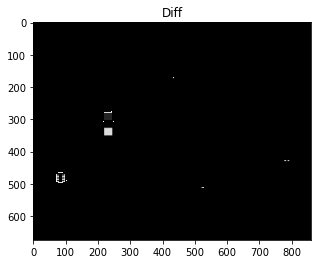

In [50]:
cb1 = cv2.imread(
    '/home/pascal/Computer_Vision/working_w_images/circuitBoard1.png', 0)
cb2 = cv2.imread(
    '/home/pascal/Computer_Vision/working_w_images/circuitBoard2.png', 0)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(cb1, cmap='gray')
axs[0].set_title('cb1')

axs[1].imshow(cb2, cmap='gray')
axs[1].set_title('cb2')

plt.show()

diff = abs((cb1 - cb2))
plt.imshow(diff, cmap='gray')
plt.title("Diff")
plt.show()


# 4 - / Image Blending

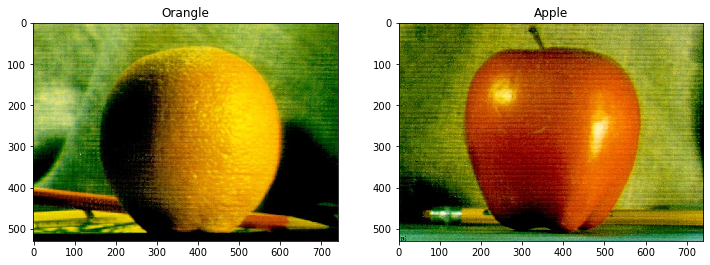

In [167]:
appleImg = plt.imread(
    '/home/pascal/Computer_Vision/working_w_images/burt_apple.png')
orangeImg = plt.imread(
    '/home/pascal/Computer_Vision/working_w_images/burt_orange.png')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(orangeImg)
axs[0].set_title('Orangle')

axs[1].imshow(appleImg)
axs[1].set_title('Apple')

plt.show()


(530, 740, 3)


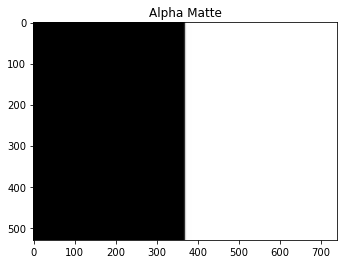

In [173]:

# def sigmoid(x, A):
#     ZA = 1/(1+np.exp(-A*np.log(2+np.sqrt(3)*(1/A))))
#     Zt = 1/(1+np.exp(-A*np.log(2+np.sqrt(3)*x)))
#     return 1/(ZA - 0.5)*(Zt-0.5)

def sigmoid(x):
    return 1/(1+np.exp(-x))

length = orangeImg.shape[0]
width = orangeImg.shape[1]
x = np.linspace(-1*int(width/2), int(width/2), width)
# x = np.linspace(int(width/2), -1*int(width/2), width)
y = sigmoid(x)
alpha = np.tile(y, (length, 1))
alpha = np.float32(alpha)
alpha = cv2.cvtColor(alpha, cv2.COLOR_GRAY2RGB)
print(alpha.shape)
# print(np.max(alpha))
# alpha *= 25
plt.imshow(alpha, cmap='gray')
plt.title("Alpha Matte")
plt.show()


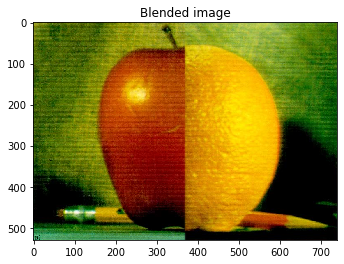

In [172]:
# alpha.shape
orangeHalf = cv2.multiply(alpha, orangeImg)
appleHalf = cv2.multiply(1.0 - alpha, appleImg)

blend = cv2.add(orangeHalf, appleHalf)
plt.imshow(blend)
plt.title('Blended image')
plt.show()
